# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 11.03.2022
**Due date:** 25.03.2022 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.

[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [7]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1: Brain segmentation

Your goal: compute the size of the brain (without the skull) in pixels in a 2D image of a human head taken by
Magnetic Resonance Imaging (MRI) using:
* Region growing (5 pts)
* Contour detection (5 pts)
* An additional method of your choice (5 pts)

Each section should display the resulting segmentation as well as the size in pixel of the detected region. Comment
each method limitations and/or advantages.

### 1.1 Brain image visualization

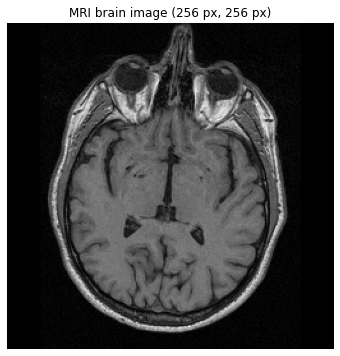

In [8]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

# Display MRI image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing (5pts)

In [9]:
def region_growing(image, seg_img, t_low, t_high, seed):   
    seeds = [seed]
    seg_img[seed[0],seed[1]] = 255
    while(len(seeds) > 0):
        seed = seeds.pop(0)
        x = seed[0]
        y = seed[1]
        for i in range(-1,2):
            for j in range(-1,2):
                if(i == 0 and j == 0):
                    continue
                if (image[x+i,y+j] > t_low and image[x+i,y+j] < t_high):
                    if seg_img[x+i,y+j] == 0:
                        seg_img[x+i,y+j] = 255
                        seeds.append([x+i,y+j])
                        
                
    return seg_img

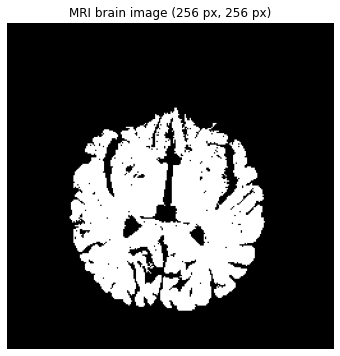

There are 15191 pixels on the brain using the Region Growing method


In [10]:
import numpy as np
import sys
sys.setrecursionlimit(1000)

seg_img = np.zeros(np.shape(brain_im))
img =  region_growing(brain_im, seg_img, 60, 96, [128,100])

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(img, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

print(f"There are {int(np.sum(img)/255)} pixels on the brain using the Region Growing method")

In [11]:
def contrast_enhancement(image):
    """
    Compute histogram and apply histogram equalization on a given image.
    :param image: Image to enhance contrast
    :return: tuple: enhanced image, input image histogram, transformed image histogram
    """
    
    image_equ = cv.equalizeHist(image)
    hist = cv.calcHist([image], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
    hist_equ = cv.calcHist([image_equ], channels=[0], mask=None, histSize=[255], ranges=[0, 256])
    
    return image_equ, hist, hist_equ

NameError: name 'display_image' is not defined

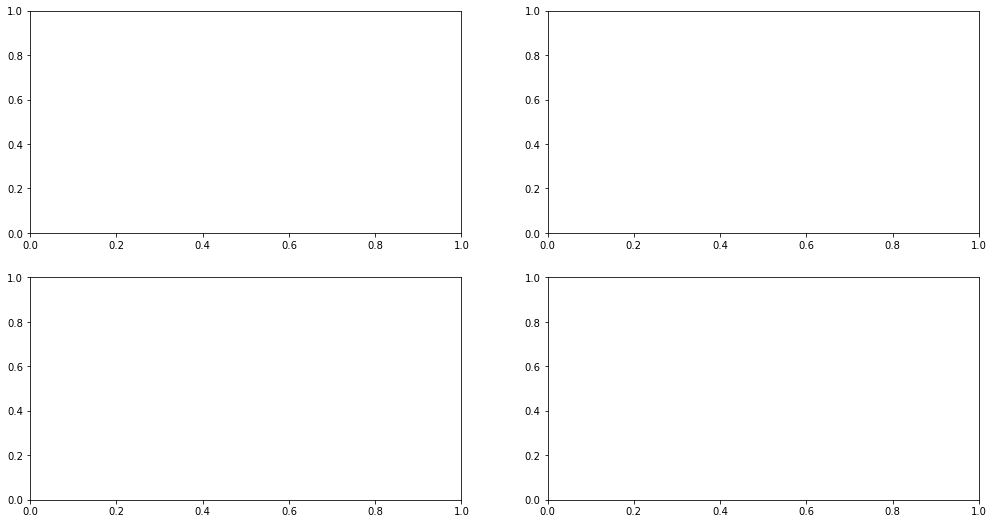

In [12]:
import cv2 as cv
# Load image
# Enhance contrast with histogram equalization
img_equ, hist, hist_equ = contrast_enhancement(brain_im)

# Display
fig, ax = plt.subplots(2, 2, figsize=(17, 9))
display_image(brain_im, axes=ax[0][0])
ax[0][0].set_title('Original')
# Histogram original
ax[0][1].bar(np.arange(hist.shape[0]), hist.reshape(-1),  width=1)
ax[0][1].set_xlim([0, 256])
ax[0][1].set_title('Histogram')
# Histogram equalized
display_image(img_equ, axes=ax[1][0])
ax[1][0].set_title('Histogram Equalized')
ax[1][1].bar(np.arange(hist_equ.shape[0]), hist_equ.reshape(-1),  width=1)
ax[1][1].set_xlim([0, 256])
ax[1][1].set_title('Histogram');

In [ ]:
# Apply 3x3 and 7x7 Gaussian blur
low_sigma = cv2.GaussianBlur(img,(3,3),0)
high_sigma = cv2.GaussianBlur(img,(5,5),0)
 
# Calculate the DoG by subtracting
dog = low_sigma - high_sigma
display_image(dog)

### 1.3 Contour detection (5pts)

In [ ]:
from skimage.filters import sobel
import cv2 as cv
from scipy import ndimage
import numpy as np

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

# Blur the image
blur_im = cv.blur(brain_im, (5,5))

# Do the edge detection using sobel operator
sobel_im = sobel(brain_im)
# Check the mean value of the edges detected to decide the threshold of the image.
print(sobel_im.mean())

# Threshold and do morphological operation(CLosing) to get the overall brain outerline. 
# (this is used to decide the background of the brain image)
ret, th_brain_im2 = cv.threshold(sobel(brain_im), 0.03, 1, cv.THRESH_BINARY)
# only_object = ndimage.binary_fill_holes(th_brain_im2).astype(np.uint8)


fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].set_title('Detected edges')
ax[0].imshow(sobel_im, cmap='gray')
ax[1].set_title('Outline of the object')
ax[1].imshow(th_brain_im2, cmap='gray');

In [ ]:
src = cv.imread(os.path.join('../','data/lab-01-data', 'brain-slice40.tiff'))
display_image(src);

In [ ]:
import numpy as np
import cv2 as cv
from __future__ import print_function
import cv2 as cv
import argparse
import random as rng

def thresh_callback(val):
    threshold = val
    # Detect edges using Canny
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    # Find contours
    _, contours, hierarchy = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Draw contours
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    # for i in range(len(contours)):
        # color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing, contours, len(contours)-1, color, 2, cv.LINE_8, hierarchy, 0)
    # Show in a Windows
    display_image(drawing)
    # cv.imshow('Contours', drawing)

# im = cv.imread('test.jpg')
imgray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))

thresh_callback(100)

# ret, thresh = cv.threshold(imgray, 90, 255, 0)
# _ , contours, hierarchy, = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# display_image(_)
# cv.drawContours(src, contours, -1, (0,255,0), 3)



### 1.4 Additional method (5pts)

In [ ]:
# Add your implementation and discussion

---
## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different
colors. We ask you to create a routine to:

1. Count the number of shapes of each color (5pts).
2. Compute the total area (in pixels) of each color (5pts).

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity
normalization should probably be used.

hint: RGB color space might not be optimal. Consider using HSV or LAB color space.

### 2.1 Visualization

In [13]:
import numpy as np
import cv2 as cv
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


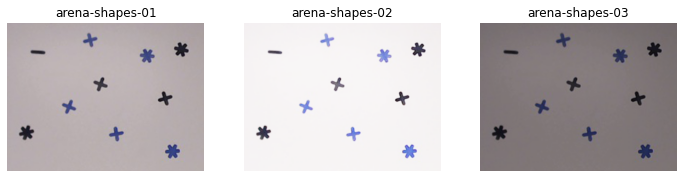

In [14]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color (5 pts)

In [15]:
# Convert images to HSV
images_HSV = np.array([cv.cvtColor(im, cv.COLOR_RGB2HSV) for im in images])
images_HSV.shape


(3, 480, 640, 3)

In [16]:
# We use the rescale_intensity function from skimage to rescale the value channel of each image
from skimage.exposure import rescale_intensity

images_HSV_eq = images_HSV.copy()
images_HSV_eq[0,:,:,2] = rescale_intensity(images_HSV[0,:,:,2])
images_HSV_eq[1,:,:,2] = rescale_intensity(images_HSV[1,:,:,2])
images_HSV_eq[2,:,:,2] = rescale_intensity(images_HSV[2,:,:,2])

In [17]:
images_RGB_eq = np.array([cv.cvtColor(im, cv.COLOR_HSV2RGB) for im in images_HSV_eq])

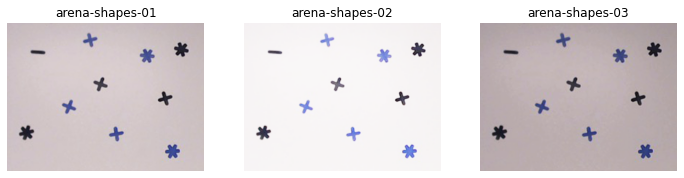

In [18]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images_RGB_eq, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

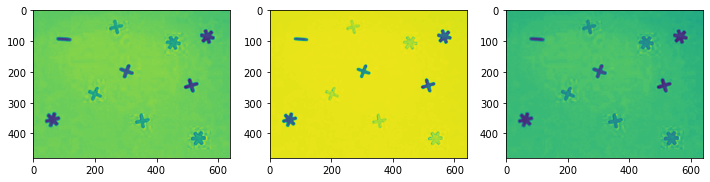

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12,12))
ax[0].imshow(images_RGB_eq[0,:,:,2])
ax[1].imshow(images_RGB_eq[1,:,:,2])
ax[2].imshow(images_RGB_eq[2,:,:,2])
plt.show()

In [22]:
# Remove small clusters that are considered as labels but are unwanted 
# (if size in pixels smaller than certain threshold)

def remove_noise(noisy_image,threshold):

    label_img_new = np.copy(noisy_image)
    num_comp = np.amax(noisy_image)
    final_num_comp = -1  # Start from -1 because we loop until num_comp + 1
    
    for i in range(num_comp+1):
        num_pixels = sum(sum(noisy_image==i))
        final_num_comp += 1
        if num_pixels < threshold:
            label_img_new[noisy_image==i] = 0
            final_num_comp -= 1
    
    return final_num_comp, label_img_new

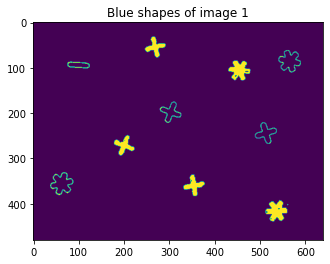

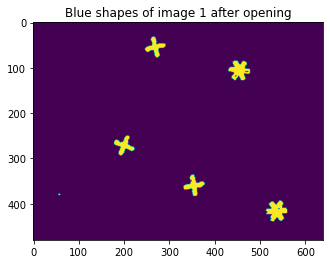

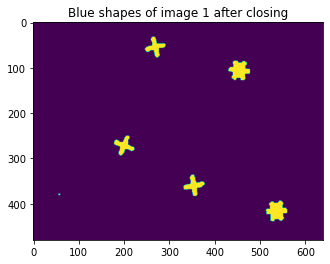

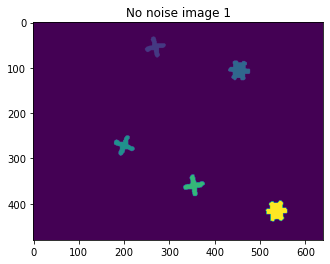

There are 5 blue shapes in image 1


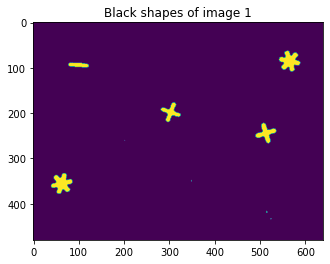

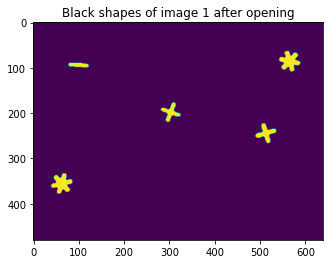

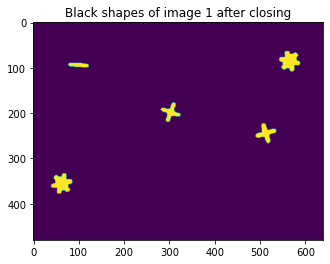

There are 5 black shapes in image 1


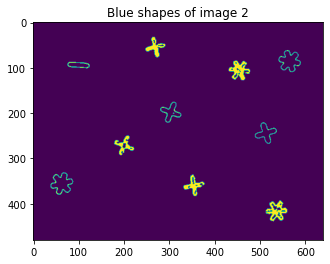

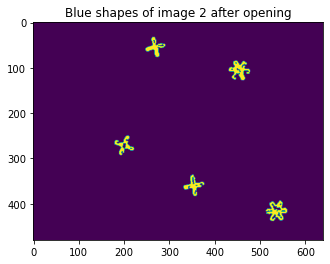

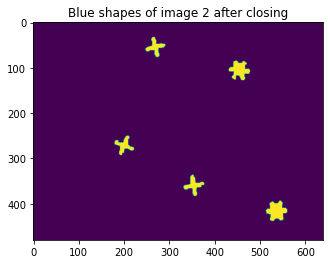

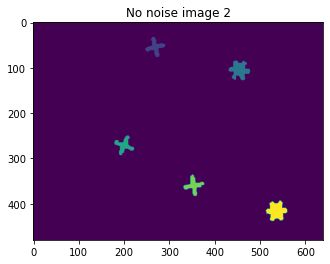

There are 5 blue shapes in image 2


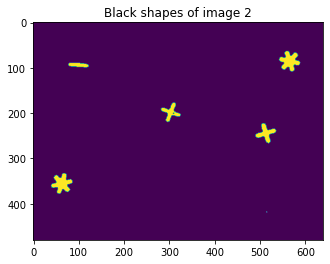

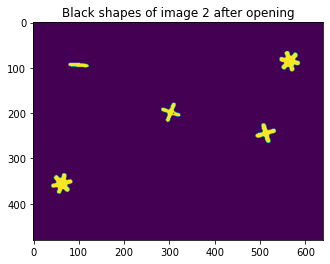

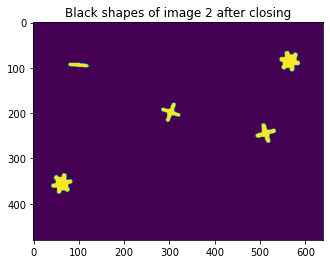

There are 5 black shapes in image 2


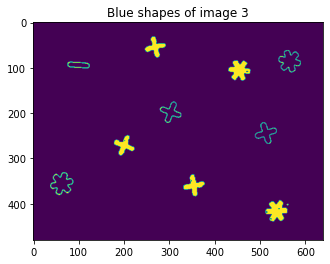

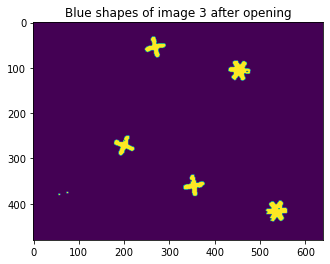

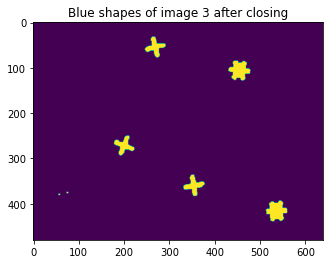

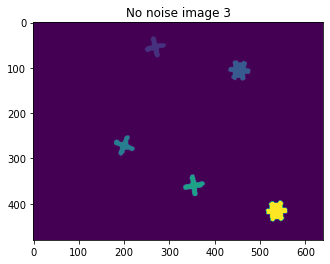

There are 5 blue shapes in image 3


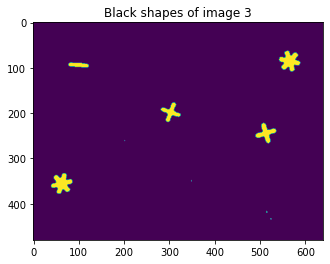

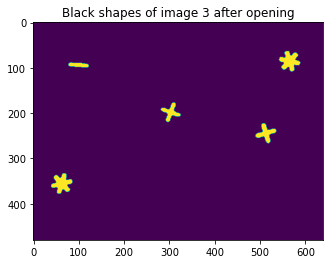

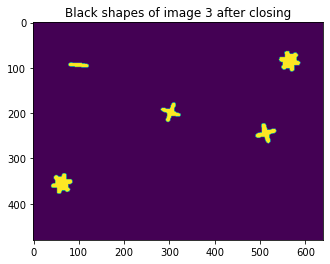

There are 5 black shapes in image 3


In [23]:
from skimage.filters import threshold_multiotsu
from skimage.morphology import binary_closing, binary_opening, square
from skimage import measure

total_area_blue = np.zeros(3)
total_area_black = np.zeros(3)

# We loop over the 3 images to compute the number of colored shapes and area in pixels of each color 
for i in range(3):
    im = images_RGB_eq[i,:,:,2]
    threshold = threshold_multiotsu(im)   # Find 2 threshold for the background, blue and black shapes
    
    blue_shapes = np.zeros(im.shape)    
    blue_mask = ((im < threshold[1]) & (im > threshold[0]))   # Create mask to keep only blue shapes
    blue_shapes[blue_mask] = 1
    
    plt.figure()
    plt.imshow(blue_shapes)
    plt.title("Blue shapes of image " + str(i+1))
    plt.show()
    
    opened_blue_shapes = binary_opening(blue_shapes, square(3))  # Remove unwanted contours of black shapes
    plt.figure()
    plt.imshow(opened_blue_shapes)
    plt.title("Blue shapes of image " + str(i+1) + " after opening")
    plt.show()
    
    closed_blue_shapes = binary_closing(opened_blue_shapes, square(7))  # Fill up missing bits of shapes
    plt.figure()
    plt.imshow(closed_blue_shapes)
    plt.title("Blue shapes of image " + str(i+1) + " after closing")
    plt.show()
        
    labels = measure.label(closed_blue_shapes)    # Create label map of blue shapes
    num_comp, no_noise_blue = remove_noise(labels,100)   # Remove the small points on bottom without 
                                                         # impacting the big shapes
    
    plt.figure()
    plt.imshow(no_noise_blue)
    plt.title(f"No noise image {i+1}")
    plt.show()
    
    print(f"There are {num_comp} blue shapes in image {i+1}")
    
    total_area_blue[i] = np.sum(no_noise_blue)

    
    black_shapes = np.zeros(im.shape)
    
    black_mask = (im <= threshold[0])
    black_shapes[black_mask] = 1
    
    plt.figure()
    plt.imshow(black_shapes)
    plt.title("Black shapes of image " + str(i+1))
    plt.show()
    
    opened_black_shapes = binary_opening(black_shapes, square(3))
    plt.figure()
    plt.imshow(opened_black_shapes)
    plt.title("Black shapes of image " + str(i+1) + " after opening")
    plt.show()
    
    closed_black_shapes = binary_closing(opened_black_shapes, square(7))
    plt.figure()
    plt.imshow(closed_black_shapes)
    plt.title("Black shapes of image " + str(i+1) + " after closing")
    plt.show()
    
    labels = measure.label(closed_black_shapes)   # No need to use remove_noise function for black 
                                                  # shapes as there is no noise
    num_comp = np.amax(labels)                    # Count number of labels
    print(f"There are {num_comp} black shapes in image {i+1}")
    
    total_area_black[i] = np.sum(closed_black_shapes)


### 2.3 Total area (in pixels) of each color (5 pts)

The computation of the number of pixels in each image was done above by looking at the number of labels generated by the label map of skimage measure using the denoised final image

In [24]:
print(f"There are {total_area_blue[0]} pixels of blue in image 1")
print(f"There are {total_area_blue[1]} pixels of blue in image 2")
print(f"There are {total_area_blue[2]} pixels of blue in image 3")

print(f"There are {total_area_black[0]} pixels of black in image 1")
print(f"There are {total_area_black[1]} pixels of black in image 2")
print(f"There are {total_area_black[2]} pixels of black in image 3")

There are 17853.0 pixels of blue in image 1
There are 14967.0 pixels of blue in image 2
There are 19610.0 pixels of blue in image 3
There are 4432.0 pixels of black in image 1
There are 4238.0 pixels of black in image 2
There are 4445.0 pixels of black in image 3
